# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.


In [1]:
#pip install --upgrade langchain

In [2]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [3]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [4]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

/Users/ayush.nema/Documents/pyenvs/LLMCompass/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.4) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [ ]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [5]:
from langchain.indexes import VectorstoreIndexCreator

In [7]:
#!pip install docarray

In [9]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
    ).from_loaders([loader])

NameError: name 'loader' is not defined

In [10]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [11]:
response = index.query(query)

NameError: name 'index' is not defined

In [ ]:
display(Markdown(response))

## Step-by-step

<div style="width: 100%;">
  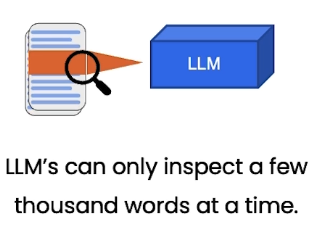
  <div style="width: 50%; float: left;"></div> <!-- Empty Column for spacing -->
    <img width="10%" height="20%">
  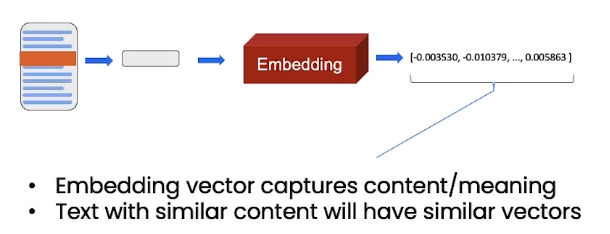
</div>

<div style="width: 100%;">
  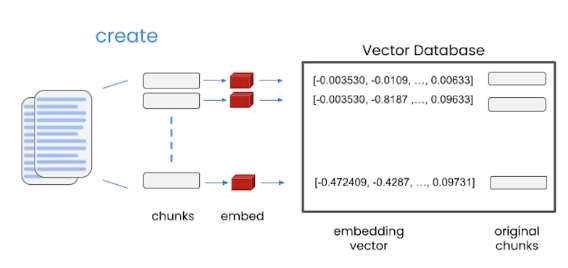
  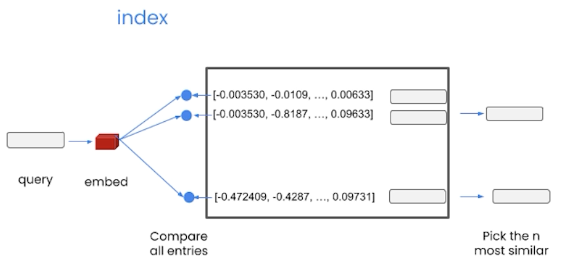
    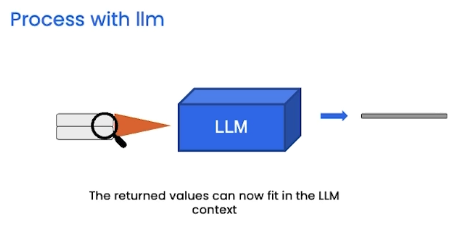
</div>


In [ ]:
from langchain.document_loaders import CSVLoader

loader = CSVLoader(file_path=file)

In [ ]:
docs = loader.load()

In [ ]:
docs[0]

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [12]:
embed = embeddings.embed_query("Hi my name is Harrison")

NameError: name 'embeddings' is not defined

In [ ]:
print(len(embed))

In [ ]:
print(embed[:5])

In [ ]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [ ]:
query = "Please suggest a shirt with sunblocking"

In [ ]:
docs = db.similarity_search(query)

In [ ]:
len(docs)

In [ ]:
docs[0]

In [ ]:
retriever = db.as_retriever()

In [ ]:
llm = ChatOpenAI(temperature = 0.0, model=llm_model)

In [ ]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [ ]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


In [ ]:
display(Markdown(response))

In [ ]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [ ]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [ ]:
response = qa_stuff.run(query)

In [ ]:
display(Markdown(response))

In [ ]:
response = index.query(query, llm=llm)

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

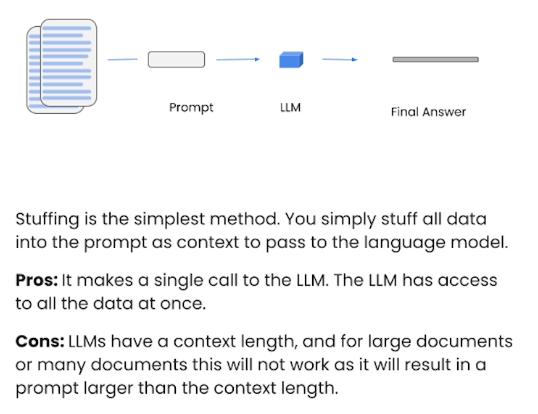
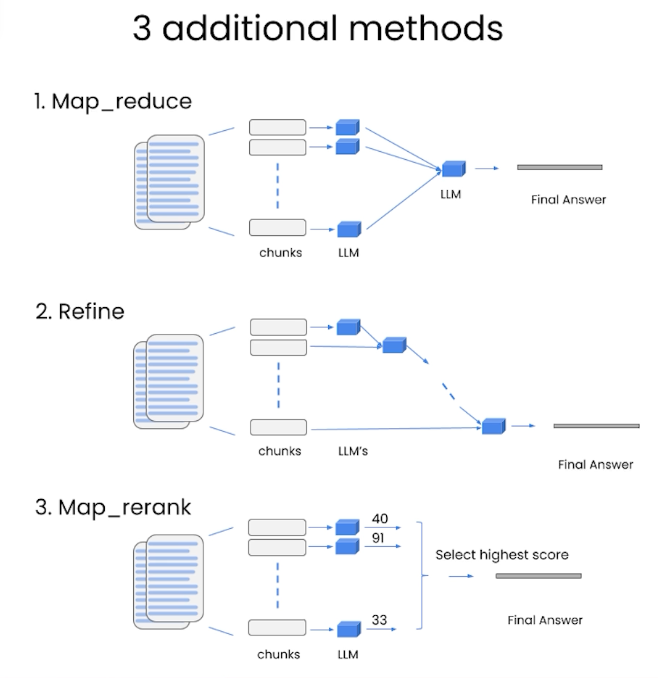